1. 결측치 제거 및 최종데이터 확정

In [2]:
import pandas as pd
import numpy as np

In [62]:
df=pd.read_excel('Online Retail.xlsx')

In [110]:
data=df

In [111]:
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [113]:
data.isnull().sum()
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [114]:
data=data[data['Quantity']>0]
data=data[data['UnitPrice']>0]
data=data[data['CustomerID'].notnull()]

In [115]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [116]:
data['Country'].value_counts().head(5)

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

In [117]:
data=data[data['Country']=='United Kingdom']

- RFM 기반 데이터 가공

In [118]:
data['CustomerID']=data['CustomerID'].astype('int')

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  int32         
 7   Country      354321 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 23.0+ MB


- 새로운 컬럼 생성

Quantity * UnitPrice

In [120]:
data['sale_amount']=data['Quantity']*data['UnitPrice']
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sale_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [121]:
data.value_counts('CustomerID').head(5)

CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
dtype: int64

In [122]:
data.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

In [123]:
aggregations={'InvoiceDate': 'max', 'InvoiceNo': 'count', 'sale_amount': 'sum'}
cust_df=data.groupby('CustomerID').agg(aggregations)

-> 컬럼명 변경

In [124]:
cust_df=cust_df.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'sale_amount':'Montetary'})
cust_df

,Recency,Frequency,Montetary
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12747,2011-12-07 14:34:00,103,4196.01
12748,2011-12-09 12:20:00,4595,33719.73
12749,2011-12-06 09:56:00,199,4090.88
12820,2011-12-06 15:12:00,59,942.34
...,...,...,...
18280,2011-03-07 09:52:00,10,180.60
18281,2011-06-12 10:53:00,7,80.82
18282,2011-12-02 11:43:00,12,178.05


In [125]:
cust_df.Recency.max()

Timestamp('2011-12-09 12:49:00')

In [126]:
cust_df.Recency.min()

Timestamp('2010-12-01 09:53:00')

In [127]:
import datetime as dt
cust_df['Recency']=dt.datetime(2011, 12, 10)-cust_df['Recency']

In [128]:
cust_df['Recency'].head()

CustomerID
12346   325 days 13:59:00
12747     2 days 09:26:00
12748     0 days 11:40:00
12749     3 days 14:04:00
12820     3 days 08:48:00
Name: Recency, dtype: timedelta64[ns]

In [132]:
cust_df['Recency']=cust_df['Recency'].apply(lambda x: x.days+1)
cust_df.head()

,Recency,Frequency,Montetary
CustomerID,,,
12346,326,1,77183.60
12747,3,103,4196.01
12748,1,4595,33719.73
12749,4,199,4090.88
12820,4,59,942.34


- 군집화

In [133]:
import pandas as pd
from sklearn.cluster import KMeans

In [135]:
from sklearn.metrics import calinski_harabasz_score
for k in range(2,10):
    kmeans_model=KMeans(n_clusters=k, random_state=1).fit(cust_df)
    labels=kmeans_model.labels_
    print(calinski_harabasz_score(cust_df, labels))

5504.448469103424
11953.105923697482
13464.393061952635
15376.493395898931
18167.05420716675
23836.35388309203
26816.851760927544
32938.56199486206


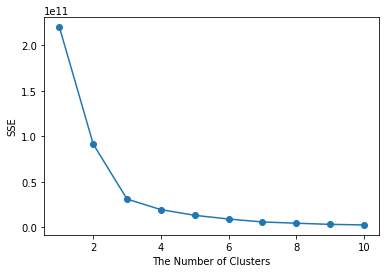

[219659576908.95178, 91337853971.95856, 30924056053.324482, 19413289051.628365, 13145320719.914032, 9074113031.661354, 5849869688.250035, 4484256575.547013, 3212554083.665906, 2604011502.030054]


In [136]:
import matplotlib.pyplot as plt
def elbow(cust_df):
    sse=[]
    for i in range(1,11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(cust_df)
        sse.append(km.inertia_)
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
    
elbow(cust_df)

3->4로 갈 때 기울기 소실이 발생 3~4 군집이 적절하다고 판단(?)

In [152]:
km=KMeans(n_clusters=3, random_state=1)
km.fit(cust_df)

new_labels=km.labels_
cust_df['cluster']=new_labels

cust_df.groupby(['cluster']).mean()

,Recency,Frequency,Montetary,silhouette
cluster,,,,
0,93.280422,83.087214,1358.228545,0.841885
1,3.666667,257.000000,207560.196667,0.598155
2,31.900000,1019.666667,46875.887000,0.447784


- 응집도, 분리도

In [153]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [154]:
score_sampels=silhouette_samples(cust_df, cust_df['cluster'])
print(score_sampels.shape)
cust_df['silhouette']=score_sampels

(3920,)


In [155]:
average_score=silhouette_score(cust_df, cust_df['cluster'])
average_score

0.9575002918024521

In [156]:
cust_df.groupby('cluster')['silhouette'].mean()

cluster
0    0.961261
1    0.613970
2    0.504544
Name: silhouette, dtype: float64

In [157]:
cust_df['cluster'].value_counts()

0    3887
2      30
1       3
Name: cluster, dtype: int64

-> 실루엣 계수는 괜찮지만 value_counts를 해보았을 때 군집에 할당되어 있는 숫자가 매우 편향되어 있는 것을 확인

- 로그 변환->정규화 후 다시 시도

In [159]:
cust_df.drop(columns=['cluster', 'silhouette'], inplace=True)

In [164]:
from sklearn.preprocessing import StandardScaler

cust_df['Recency_log']=np.log1p(cust_df['Recency'])
cust_df['Frequency_log']=np.log1p(cust_df['Frequency'])
cust_df['Montetary_log']=np.log1p(cust_df['Montetary'])

X_features=cust_df[['Recency_log', 'Frequency_log', 'Montetary_log']].values
X_features_scaled=StandardScaler().fit_transform(X_features)
X_features_scaled

array([[ 1.48161832, -2.40338709,  3.78591383],
       [-1.88997639,  0.73257781,  1.44428   ],
       [-2.42067319,  3.73941895,  3.1199826 ],
       ...,
       [-1.26910093, -0.91780272, -1.09247605],
       [-1.71913018,  2.30798143,  0.88585825],
       [-0.05406709,  0.42962703,  0.78039553]])

In [165]:
km=KMeans(n_clusters=3, random_state=1)
km.fit(X_features_scaled)

new_labels=km.labels_
cust_df['cluster']=new_labels

cust_df.groupby(['cluster']).mean()

,Recency,Frequency,Montetary,Recency_log,Frequency_log,Montetary_log
cluster,,,,,,
0,177.284565,15.203365,288.110286,4.904779,2.505986,5.415735
1,15.773184,258.554190,5733.861486,2.400172,5.206886,8.065427
2,64.586248,61.599517,1075.234477,3.774340,3.921522,6.658075


In [166]:
score_sampels=silhouette_samples(X_features_scaled, cust_df['cluster'])
print(score_sampels.shape)
cust_df['silhouette']=score_sampels

(3920,)


In [167]:
average_score=silhouette_score(X_features_scaled, cust_df['cluster'])
print(average_score)

0.30338271228630287


In [169]:
cust_df.groupby('cluster')['silhouette'].mean()

cluster
0    0.346130
1    0.321851
2    0.258169
Name: silhouette, dtype: float64

In [170]:
cust_df['cluster'].value_counts()

2    1658
0    1367
1     895
Name: cluster, dtype: int64

실루엣 계수는 낮아졌지만 잘 분포됨(?)

왜곡된 데이터세트에 대해서는 로그 변환으로 데이터를 일차 변환한 후에 군집화를 수행하면 더 나은 결과를 도출 할 수 있슴~_~

In [173]:
cust_df

,Recency,Frequency,Montetary,Recency_log,Frequency_log,Montetary_log,cluster,silhouette
CustomerID,,,,,,,,
12346,326,1,77183.60,5.789960,0.693147,11.253955,2,0.039367
12747,3,103,4196.01,1.386294,4.644391,8.342128,1,0.449406
12748,1,4595,33719.73,0.693147,8.432942,10.425868,1,0.330247
12749,4,199,4090.88,1.609438,5.298317,8.316760,1,0.519595
12820,4,59,942.34,1.609438,4.094345,6.849427,1,0.096893
...,...,...,...,...,...,...,...,...
18280,278,10,180.60,5.631212,2.397895,5.201806,0,0.539573
18281,181,7,80.82,5.204007,2.079442,4.404522,0,0.514993
18282,8,12,178.05,2.197225,2.564949,5.187665,2,0.044918


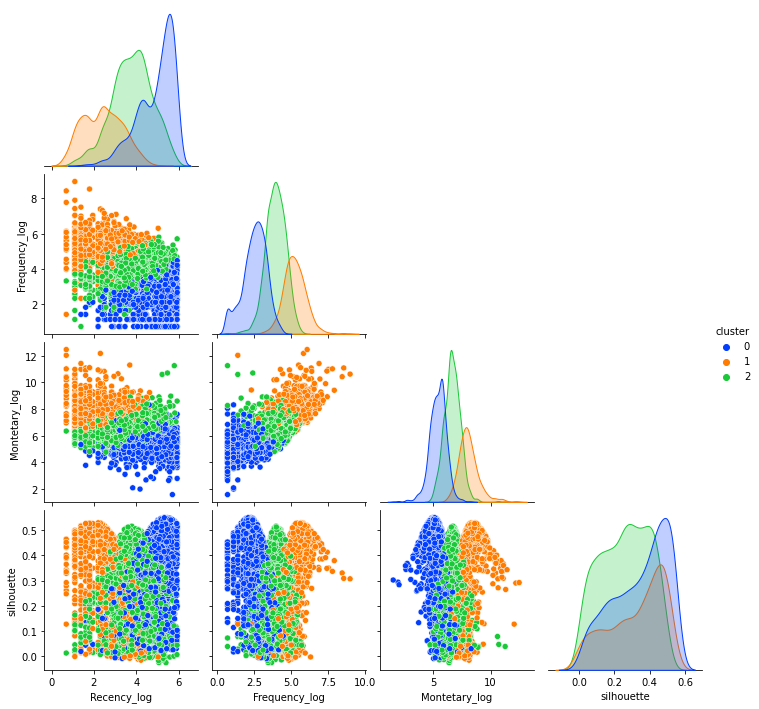

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(cust_df.iloc[:, 3:], diag_kind='kde', hue='cluster', corner=True, palette='bright')
plt.show()